<a href="https://colab.research.google.com/github/robajo12/data301_predictive_analytics_machine_learning/blob/main/ml_projects/Python_Advanced_Pandas_DataWrangling_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 : Python Data Analysis using salaries dataset

# Data Exploration:  This should include summary statistics, means, medians, quartiles, or any other relevant information about the data set. 

In [ ]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/niteen11/data301_predictive_analytics_machine_learning/main/data/Salaries.csv')

In [ ]:
type(df)

In [ ]:
# 397 rows = 397 employees
df.shape

(397, 7)

In [ ]:
df

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...,...
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738
395,396,Prof,A,25,15,Male,95329


In [ ]:
df.describe()

,Unnamed: 0,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000,397.000000
mean,199.000000,22.314861,17.614610,113706.458438
std,114.748275,12.887003,13.006024,30289.038695
min,1.000000,1.000000,0.000000,57800.000000
25%,100.000000,12.000000,7.000000,91000.000000
50%,199.000000,21.000000,16.000000,107300.000000
75%,298.000000,32.000000,27.000000,134185.000000
max,397.000000,56.000000,60.000000,231545.000000


# Mean/median of all salaries

In [ ]:
# Mean of all salaries
df['salary'].mean()

113706.45843828715

In [ ]:
# Median of all salaries
df['salary'].median()

107300.0

# Median salary between gender and/or rank(title) Etc...


Making a new Data Frame that only has the columns 'sex' and 'salary'

In [ ]:
new_df1 = df[['sex','salary']]


In [ ]:
new_df1

,sex,salary
0,Male,139750
1,Male,173200
2,Male,79750
3,Male,115000
4,Male,141500
...,...,...
392,Male,103106
393,Male,150564
394,Male,101738
395,Male,95329


Finding the Median salary for all males

In [ ]:
new_df2 = new_df1[new_df1['sex']=='Male']

In [ ]:
new_df2

,sex,salary
0,Male,139750
1,Male,173200
2,Male,79750
3,Male,115000
4,Male,141500
...,...,...
392,Male,103106
393,Male,150564
394,Male,101738
395,Male,95329


In [ ]:
new_df2['salary'].median()

108043.0

Finding the Median salary for all females

In [ ]:
new_df3 = new_df1[new_df1['sex']=='Female']

In [ ]:
new_df3

,sex,salary
9,Female,129000
19,Female,137000
24,Female,74830
34,Female,80225
35,Female,77000
47,Female,151768
48,Female,140096
52,Female,74692
63,Female,103613
68,Female,111512


In [ ]:
new_df3['salary'].median()

103750.0

Comparing the Mean salary of Males and Females

In [ ]:
Mean_salary_Male = round(new_df2['salary'].mean(),2)
Mean_salary_Male

115090.42

In [ ]:
Mean_salary_Female = round(new_df3['salary'].mean(),2)
Mean_salary_Female

101002.41

In [ ]:
# The difference between mean salaries of male and female
diff = round(Mean_salary_Male - Mean_salary_Female, 2)
diff


14088.01

# Data Wrangling – perform some basic transformations on the data

People who have 20 years of experience (Total: 157), (Mean Salary: 122,520.66)

In [ ]:
TwentyYearsExp_df = df[df['yrs.service']>=20]
TwentyYearsExp_df.count()

Unnamed: 0       157
rank             157
discipline       157
yrs.since.phd    157
yrs.service      157
sex              157
salary           157
dtype: int64

In [ ]:
MeanSalary1=round(TwentyYearsExp_df['salary'].mean(),2)

In [ ]:
MeanSalary1

122520.66

Comparing the salaries of people who have 20+ years of experience vs less than 20 years of experience

In [ ]:
LessTwentyYearsExp_df = df[df['yrs.service']<20]
LessTwentyYearsExp_df.head()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
5,6,AssocProf,B,6,6,Male,97000
9,10,Prof,B,18,18,Female,129000


In [ ]:
MeanSalary2=round(LessTwentyYearsExp_df['salary'].mean(),2)
MeanSalary2

107940.5

In [ ]:
diff_2 = round(MeanSalary1 - MeanSalary2, 2 )
diff_2

14580.16

People who have salary of greater than or equal to 200,000

In [ ]:
Greaterthan200K = df[df['salary']>=200000]


In [ ]:
Greaterthan200K.count()

Unnamed: 0       3
rank             3
discipline       3
yrs.since.phd    3
yrs.service      3
sex              3
salary           3
dtype: int64

In [ ]:
Greaterthan200K


,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
43,44,Prof,B,38,38,Male,231545
249,250,Prof,A,29,7,Male,204000
364,365,Prof,A,43,43,Male,205500


Your Findings here...

- Professors with less than 20 years of experiences have a salary which is closed to the median of all salaries.

- Professors with salary greater than or equal to 200,000 are all males.  



# Rename values, subset columns, etc

In [ ]:
#drop columns Unmaned:0
df1 = df.drop(columns =['Unnamed: 0'])


In [ ]:
#Replace sex values
df1['sex'] = df1['sex'].replace(['Male', 'Female'],['M','F'])
print (df1)

         rank discipline  yrs.since.phd  yrs.service sex  salary
0        Prof          B             19           18   M  139750
1        Prof          B             20           16   M  173200
2    AsstProf          B              4            3   M   79750
3        Prof          B             45           39   M  115000
4        Prof          B             40           41   M  141500
..        ...        ...            ...          ...  ..     ...
392      Prof          A             33           30   M  103106
393      Prof          A             31           19   M  150564
394      Prof          A             42           25   M  101738
395      Prof          A             25           15   M   95329
396  AsstProf          A              8            4   M   81035

[397 rows x 6 columns]


# Create some simple visualizations showing some simple statistics

In [ ]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

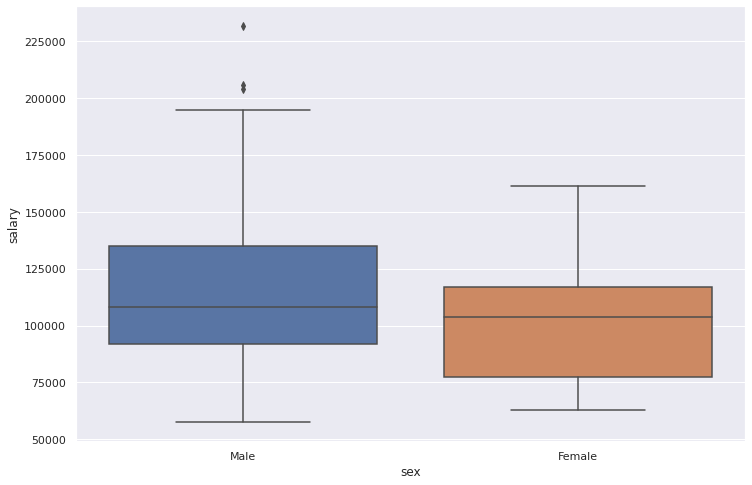

In [ ]:
sns.boxplot(x='sex', y='salary', data = df)
plt.show()

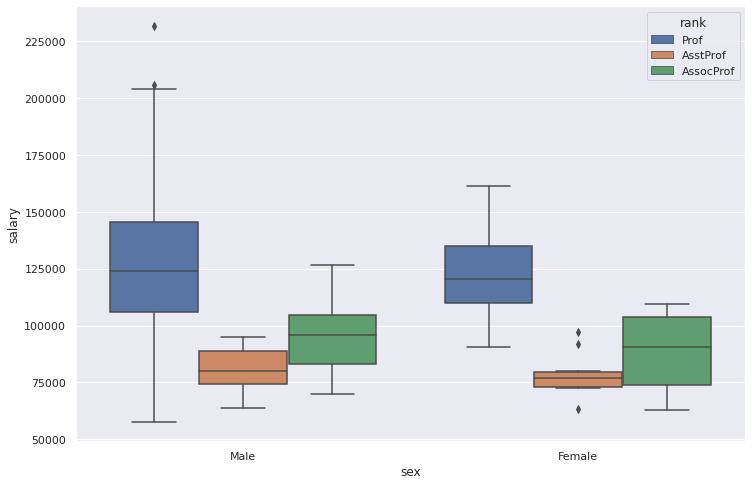

In [ ]:
sns.boxplot(x='sex', y='salary', hue='rank', data = df)
plt.show()

Your observations from the visuals: 

# Draw some conclusions based on the data.  What did you discover?

Based on the analysis performed above, the conclusions are as follows:

 There are three outliers all males. These outliers may have influenced the mean of Males' salaries. 

  I also discovered that almost 70% of males in the dataset have a salary above the mean of all males salaries while most of Females (around the same percentage 65%) have a salary below the mean of Females' salaries

 



